In [32]:
def collision_final(a0, b0, c0):
    A = ['A'] * a0
    B = ['B'] * b0
    C = ['C'] * c0
    N = A + B + C
    repeat = 500
    r = 1
    
    while(len(set(N)) > 1 and r < repeat):
        n = len(N)
        d = np.random.default_rng()
        D = d.choice(n, 2, replace=False)
        i, j = D[0], D[1]        
        if (N[i] == 'A' and N[j] == 'B') or (N[j] == 'A' and N[i] == 'B'):
            A.pop(-1)
            B.pop(-1)
            C.append('C')
            C.append('C')
        elif (N[i] == 'A' and N[j] == 'C') or (N[j] == 'A' and N[i] == 'C'):
            A.pop(-1)
            C.pop(-1)
            B.append('B')
            B.append('B')      
        elif (N[i] == 'B' and N[j] == 'C') or (N[j] == 'B' and N[i] == 'C'):
            B.pop(-1)
            C.pop(-1)
            A.append('A')
            A.append('A')        
        N = A + B + C
        r += 1
        
    return (len(A), len(B), len(C))

print(collision_final(6, 1, 1))
print(collision_final(2, 7, 12))
print(collision_final(1, 0, 7))
print(collision_final(2, 2, 2))
print(collision_final(3, 1, 7))
print(collision_final(1, 4, 7))

(8, 0, 0)
(7, 9, 5)
(0, 8, 0)
(0, 6, 0)
(5, 3, 3)
(4, 4, 4)


Finding the final outcomes of the system $N = 5$.

In [34]:
from itertools import product
  
# Generating and printing all possible outcomes for N=5
results = []
for a0, b0, c0 in product(range(6), repeat=3):
    if a0 + b0 + c0 == 5:
        result = collision_final(a0, b0, c0)
        results.append(((a0, b0, c0), result))

results


[((0, 0, 5), (0, 0, 5)),
 ((0, 1, 4), (5, 0, 0)),
 ((0, 2, 3), (0, 5, 0)),
 ((0, 3, 2), (0, 0, 5)),
 ((0, 4, 1), (5, 0, 0)),
 ((0, 5, 0), (0, 5, 0)),
 ((1, 0, 4), (0, 5, 0)),
 ((1, 1, 3), (0, 0, 5)),
 ((1, 2, 2), (5, 0, 0)),
 ((1, 3, 1), (0, 5, 0)),
 ((1, 4, 0), (0, 0, 5)),
 ((2, 0, 3), (5, 0, 0)),
 ((2, 1, 2), (0, 5, 0)),
 ((2, 2, 1), (0, 0, 5)),
 ((2, 3, 0), (5, 0, 0)),
 ((3, 0, 2), (0, 0, 5)),
 ((3, 1, 1), (5, 0, 0)),
 ((3, 2, 0), (0, 5, 0)),
 ((4, 0, 1), (0, 5, 0)),
 ((4, 1, 0), (0, 0, 5)),
 ((5, 0, 0), (5, 0, 0))]

Adjusting the function to handle the case where $N = 10$

In [36]:
results_N10 = []
for a0, b0, c0 in product(range(11), repeat=3):
    if a0 + b0 + c0 == 10:
        result = collision_final(a0, b0, c0)
        results_N10.append(((a0, b0, c0), result))

results_N10

[((0, 0, 10), (0, 0, 10)),
 ((0, 1, 9), (7, 2, 1)),
 ((0, 2, 8), (1, 6, 3)),
 ((0, 3, 7), (5, 2, 3)),
 ((0, 4, 6), (2, 6, 2)),
 ((0, 5, 5), (3, 5, 2)),
 ((0, 6, 4), (5, 2, 3)),
 ((0, 7, 3), (4, 2, 4)),
 ((0, 8, 2), (10, 0, 0)),
 ((0, 9, 1), (5, 2, 3)),
 ((0, 10, 0), (0, 10, 0)),
 ((1, 0, 9), (3, 5, 2)),
 ((1, 1, 8), (6, 3, 1)),
 ((1, 2, 7), (1, 2, 7)),
 ((1, 3, 6), (1, 6, 3)),
 ((1, 4, 5), (8, 2, 0)),
 ((1, 5, 4), (1, 5, 4)),
 ((1, 6, 3), (2, 7, 1)),
 ((1, 7, 2), (6, 3, 1)),
 ((1, 8, 1), (0, 10, 0)),
 ((1, 9, 0), (5, 4, 1)),
 ((2, 0, 8), (4, 2, 4)),
 ((2, 1, 7), (8, 1, 1)),
 ((2, 2, 6), (4, 4, 2)),
 ((2, 3, 5), (3, 1, 6)),
 ((2, 4, 4), (3, 2, 5)),
 ((2, 5, 3), (2, 2, 6)),
 ((2, 6, 2), (0, 10, 0)),
 ((2, 7, 1), (3, 2, 5)),
 ((2, 8, 0), (3, 3, 4)),
 ((3, 0, 7), (2, 5, 3)),
 ((3, 1, 6), (2, 3, 5)),
 ((3, 2, 5), (6, 2, 2)),
 ((3, 3, 4), (0, 9, 1)),
 ((3, 4, 3), (0, 10, 0)),
 ((3, 5, 2), (5, 1, 4)),
 ((3, 6, 1), (0, 0, 10)),
 ((3, 7, 0), (2, 6, 2)),
 ((4, 0, 6), (4, 6, 0)),
 ((4, 1, 5), (0,

In [42]:
def can_stabilize_and_stats(N):
    # Initialize counters for the number of stable and unstable configurations
    stable_count = 0
    total_count = (N + 1) * (N + 2) // 2  # Total possible configurations

    # Iterate through all possible configurations
    for a in range(N + 1):
        for b in range(N + 1 - a):
            c = N - a - b
            # Check if the system can stabilize
            if (a - b) % 3 == 0 or (b - c) % 3 == 0 or (a - c) % 3 == 0:
                stable_count += 1

    unstable_count = total_count - stable_count
    probability_stable = stable_count / total_count

    # Print the statistics
    print(f"Total configurations: {total_count}")
    print(f"Stable configurations (True): {stable_count}")
    print(f"Unstable configurations (False): {unstable_count}")
    print(f"Probability of being stable: {probability_stable}")

    return {
        "Total": total_count,
        "Stable (True)": stable_count,
        "Unstable (False)": unstable_count,
        "Probability of Stable": probability_stable
    }

# For example, let's check for N = 4
stats_N4 = can_stabilize_and_stats(4)
print(stats_N4)
stats_N9 = can_stabilize_and_stats(9)
print(stats_N9)

Total configurations: 15
Stable configurations (True): 15
Unstable configurations (False): 0
Probability of being stable: 1.0
{'Total': 15, 'Stable (True)': 15, 'Unstable (False)': 0, 'Probability of Stable': 1.0}
Total configurations: 55
Stable configurations (True): 19
Unstable configurations (False): 36
Probability of being stable: 0.34545454545454546
{'Total': 55, 'Stable (True)': 19, 'Unstable (False)': 36, 'Probability of Stable': 0.34545454545454546}


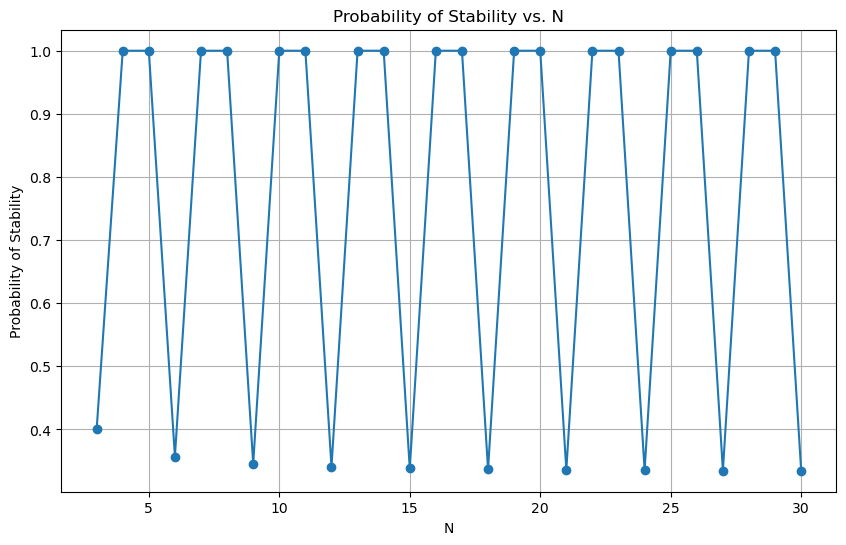

In [45]:
import matplotlib.pyplot as plt

def can_stabilize(N):
    stable_count = 0
    for a in range(N + 1):
        for b in range(N + 1 - a):
            c = N - a - b
            if (a - b) % 3 == 0 or (b - c) % 3 == 0 or (a - c) % 3 == 0:
                stable_count += 1
    return stable_count / ((N + 1) * (N + 2) // 2)

# Generate the probabilities for N from 3 to 30
probabilities = [can_stabilize(N) for N in range(3, 31)]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(3, 31), probabilities, marker='o')
plt.title('Probability of Stability vs. N')
plt.xlabel('N')
plt.ylabel('Probability of Stability')
plt.grid(True)
plt.show()
